In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

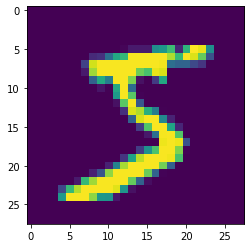

In [7]:
plt.imshow(X_train[0])

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [17]:
X_train[0].max()

255

In [18]:
X_train[0].min()

0

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
X_train[0].max()

1.0

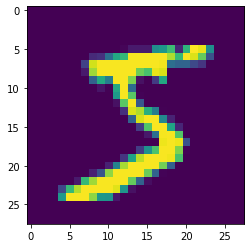

In [22]:
plt.imshow(X_train[0])

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

In [28]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [29]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
28*28

784

In [34]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation =  'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [37]:
model.fit(X_train,y_cat_train, epochs = 10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 887us/sample - loss: 0.1449 - accuracy: 0.9569 - val_loss: 0.0607 - val_accuracy: 0.9794
Epoch 2/10
60000/60000 [==============================] - 48s 808us/sample - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0404 - val_accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 47s 787us/sample - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0426 - val_accuracy: 0.9867


In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.144949,0.956900,0.060724,0.9794
1,0.047599,0.985367,0.040364,0.9868
2,0.031156,0.990250,0.042599,0.9867


<AxesSubplot:>

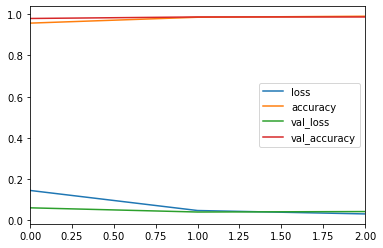

In [42]:
metrics.plot()

<AxesSubplot:>

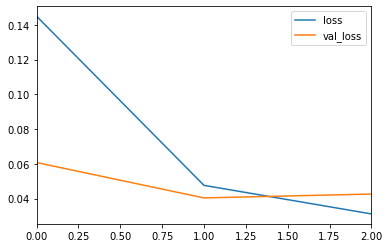

In [43]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

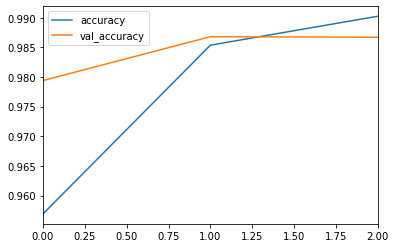

In [47]:
metrics[['accuracy','val_accuracy']].plot()

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
Predictions =  model.predict_classes(X_test)

In [50]:
y_cat_test.shape

(10000, 10)

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



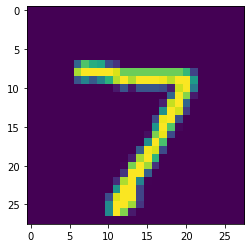

In [55]:
plt.imshow(X_test[0])

In [58]:
X_test.shape

(10000, 28, 28, 1)

In [57]:
model.predict_classes(X_test[0].reshape(1,28,28,1))

array([7], dtype=int64)